Crypto portfolio analysis.
The following coins listed below will be subject to market analysis pulling the relevant data required to make informed investment decisions. 
Cardano (ADA)
Ethereum (ETH)
XRP (XRP)
ARPA (ARPA)


In [78]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Import the necessary libraries to work with the data requried. 

Define the function for getting the API crypto data from crypto watch. 

In [79]:
def get_price_data(symbol, exchange='bitfinex', after='2022-09-01'):
    url = "https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc".format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        "periods": "3600", 
        "after": str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=['CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

Creating the period by using pandas as pd. fetching a time stamp and finding the amount of elapsed time between the current time and the last week.

In [80]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-06-20 07:23:20.216774')

Fetch the price for ADA, ETH, XRP, ARPA

In [81]:
ada = get_price_data('ada', 'bitstamp', after=last_week)
eth = get_price_data('eth', 'bitstamp', after=last_week)
xrp = get_price_data('xrp', 'bitstamp', after=last_week)
btc = get_price_data('btc', 'bitstamp', after=last_week)
# arpa = get_price_data('arpa', 'bitstamp', after=last_week)
# id = get_price_data('id', 'bitstamp', after=last_week)

ADA price data

In [82]:
ada.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-20 08:00:00,0.25951,0.25960,0.25882,0.25882,22002.250083,5698.506188
2023-06-20 09:00:00,0.25868,0.25868,0.25777,0.25780,7913.872298,2044.173697
2023-06-20 10:00:00,0.25771,0.25796,0.25771,0.25780,1028.861225,265.302267
2023-06-20 11:00:00,0.25862,0.25862,0.25862,0.25862,529.830215,137.024690
2023-06-20 12:00:00,0.25864,0.25990,0.25861,0.25990,62677.474916,16256.775753


<Axes: xlabel='CloseTime'>

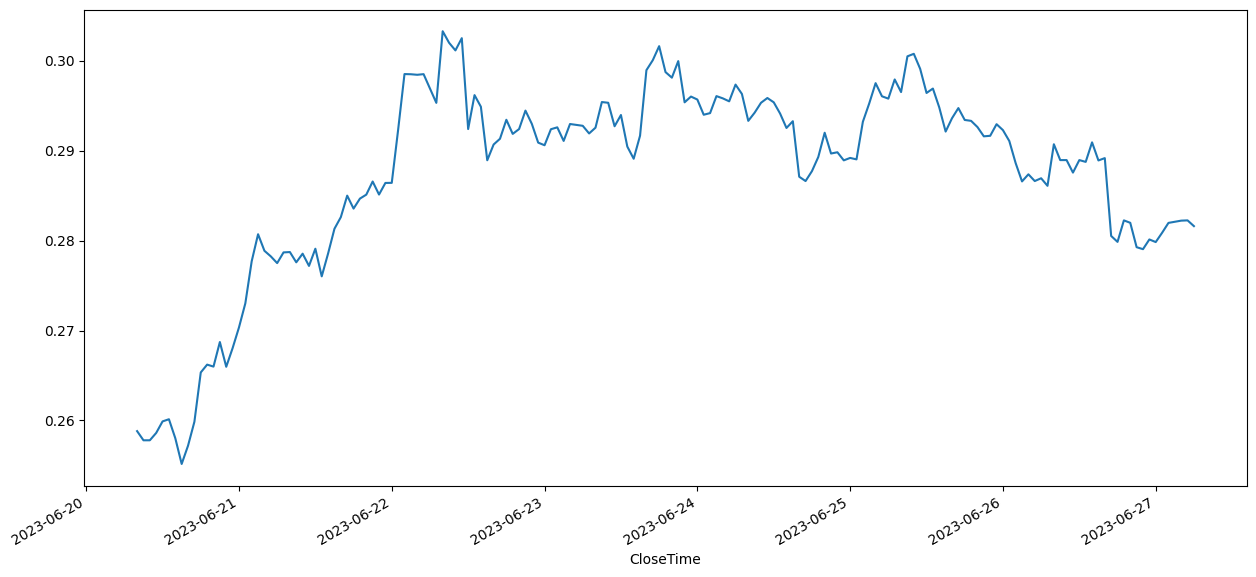

In [83]:
ada['ClosePrice'].plot(figsize=(15,7))

<Axes: xlabel='CloseTime'>

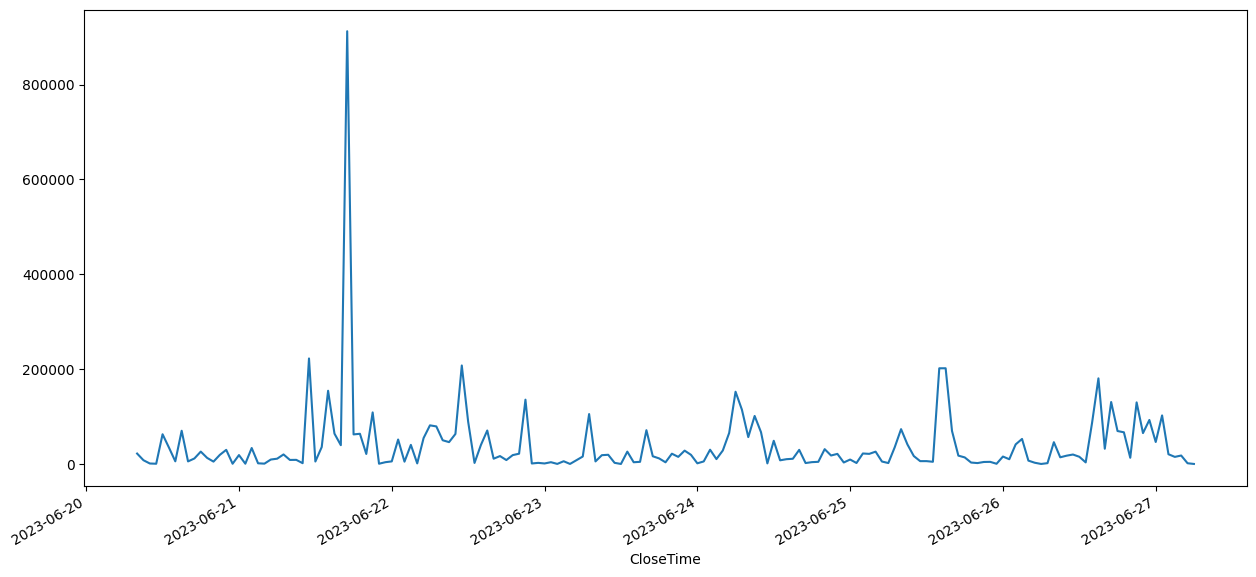

In [84]:
ada['Volume'].plot(figsize=(15, 7))

ETH price data

In [85]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-20 08:00:00,1728.4,1730.0,1726.9,1729.5,55.340476,95701.853525
2023-06-20 09:00:00,1729.5,1729.5,1723.5,1724.7,77.896395,134493.869755
2023-06-20 10:00:00,1723.6,1730.2,1723.4,1728.0,87.663351,151355.156153
2023-06-20 11:00:00,1727.9,1731.9,1726.9,1729.3,65.570043,113391.203152
2023-06-20 12:00:00,1728.9,1733.4,1727.0,1732.1,57.724909,99796.544165


<Axes: xlabel='CloseTime'>

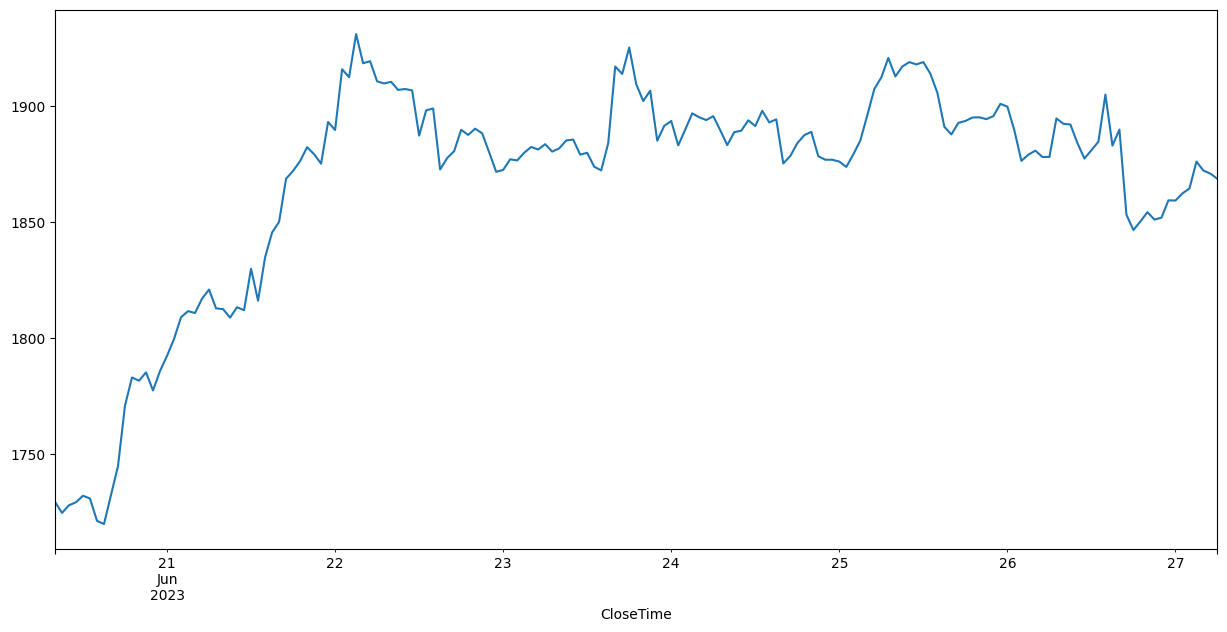

In [86]:
eth["ClosePrice"].plot(figsize=(15, 7))

<Axes: xlabel='CloseTime'>

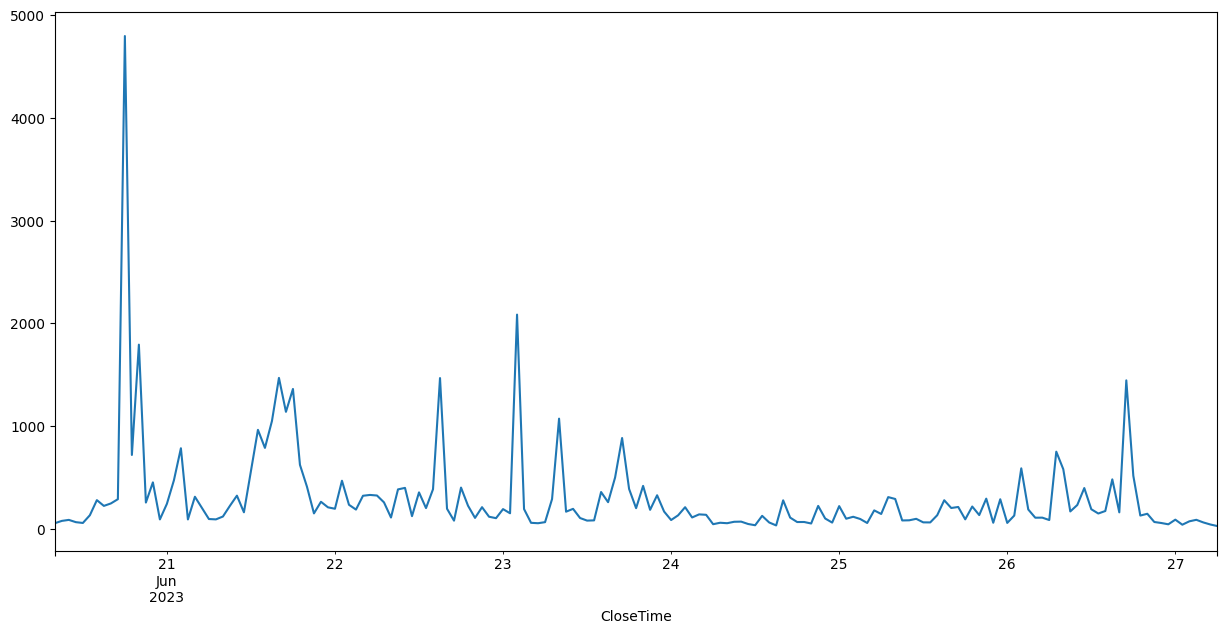

In [87]:
eth['Volume'].plot(figsize=(15, 7))

XRP price data

In [88]:
xrp.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-06-20 08:00:00,0.48374,0.48744,0.48314,0.48744,1.215168e+06,589163.821562
2023-06-20 09:00:00,0.48717,0.48717,0.48224,0.48269,5.768087e+05,279096.867134
2023-06-20 10:00:00,0.48273,0.48479,0.48210,0.48412,3.759292e+05,181865.057707
2023-06-20 11:00:00,0.48405,0.48481,0.47792,0.48064,1.676385e+06,808001.604405
2023-06-20 12:00:00,0.48074,0.48303,0.47972,0.48303,1.372579e+06,661413.438419


<Axes: xlabel='CloseTime'>

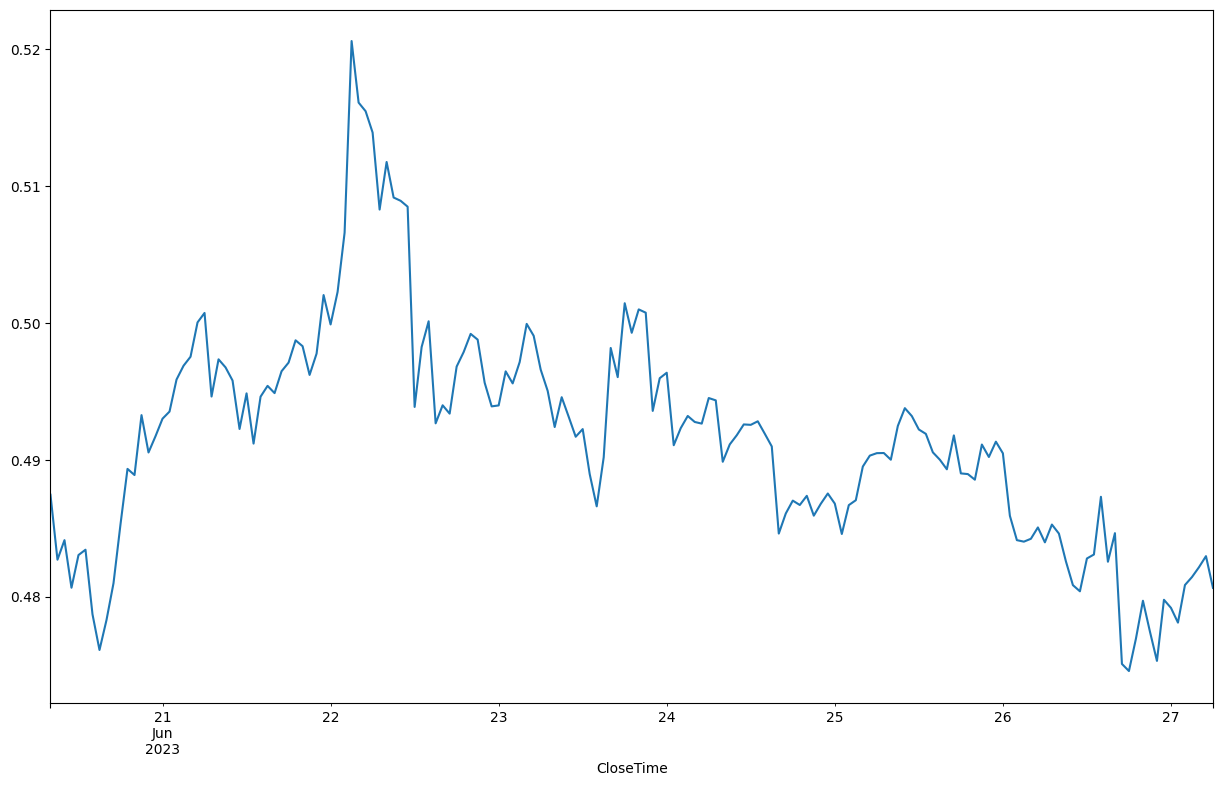

In [89]:
xrp['ClosePrice'].plot(figsize=(15, 9))

<Axes: xlabel='CloseTime'>

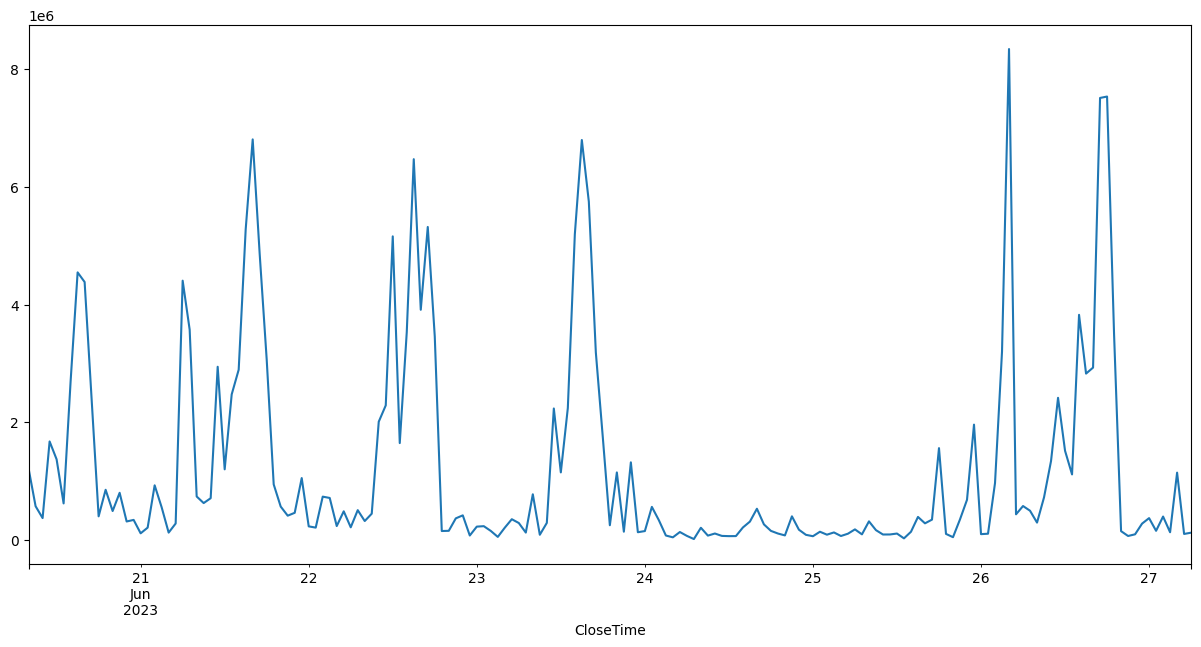

In [90]:
xrp['Volume'].plot(figsize=(15, 7))

To find the liquidity of each of the cryptos above, below each cyptos heat map displays...

In [91]:
btc['ClosePrice'].corr(btc['Volume'])

-0.09473217634157587

In [92]:
ada['ClosePrice'].corr(ada['Volume'])

0.025490998763164744

In [93]:
xrp['ClosePrice'].corr(xrp["Volume"])

-0.13823152520313528

In [94]:
eth['ClosePrice'].corr(eth['Volume'])

-0.17324396271006773